In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
from sklearn.ensemble import RandomForestClassifier

In [7]:
from sklearn.impute import SimpleImputer

In [8]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [9]:
data = pd.read_csv('Automobile_insurance_fraud.csv')

In [10]:
new_column_names = ['months_as_customer', 'age', 'policy_number', 'policy_bind_date', 'policy_state', 'policy_csl', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'capital-gains', 'capital-loss', 'incident_date', 'incident_type', 'collision_type', 'incident_severity', 'authorities_conacted', 'incident_state', 'incident_city', 'incident_location', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'property_damage', 'bodily_injuries', 'witnesses', 'police_report_available', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make', 'auto_model', 'auto_year', 'fraud_reported']

In [11]:
data.columns = new_column_names

In [12]:
label_encoder = {}
categorical_columns = data.select_dtypes(include=['object']).columns

In [13]:
for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoder[column] = le

In [14]:
x = data.drop(columns = ['fraud_reported'])
y = data['fraud_reported']

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [16]:
model = RandomForestClassifier(random_state=42)

In [17]:
model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [18]:
y_pred = model.predict(x_test)

In [19]:
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)
confusion_matrix_result = confusion_matrix(y_test, y_pred)

In [20]:
print(f'Accuracy: {accuracy}')
print('Classification Report:\n', classification_report_result)
print('Confusion Matrix:\n', confusion_matrix_result)

Accuracy: 0.7666666666666667
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.89      0.85       226
           1       0.54      0.38      0.44        74

    accuracy                           0.77       300
   macro avg       0.68      0.64      0.65       300
weighted avg       0.75      0.77      0.75       300

Confusion Matrix:
 [[202  24]
 [ 46  28]]


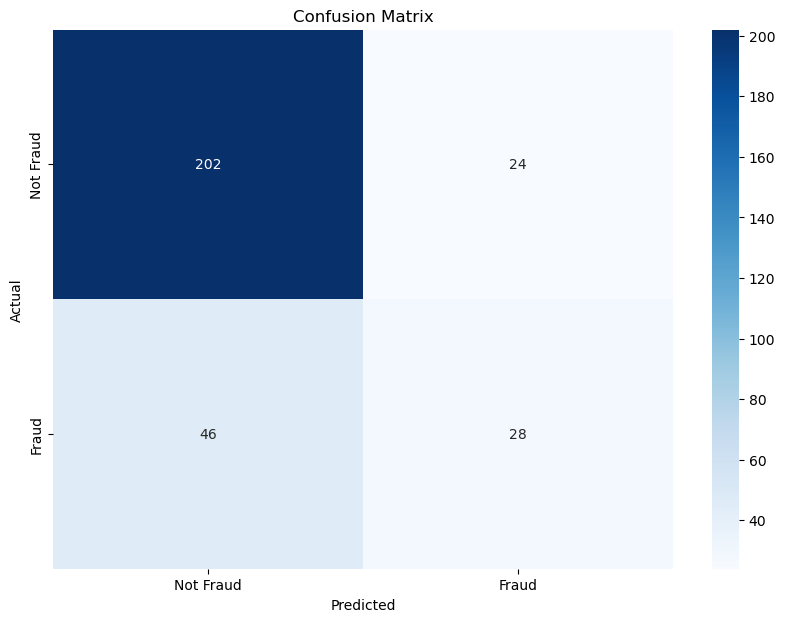

In [21]:
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix_result, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [22]:
feature_importance = model.feature_importances_
features = x.columns
importance_data = pd.DataFrame({'Feature': features, 'Importance': feature_importance}).sort_values(by='Importance', ascending=False)

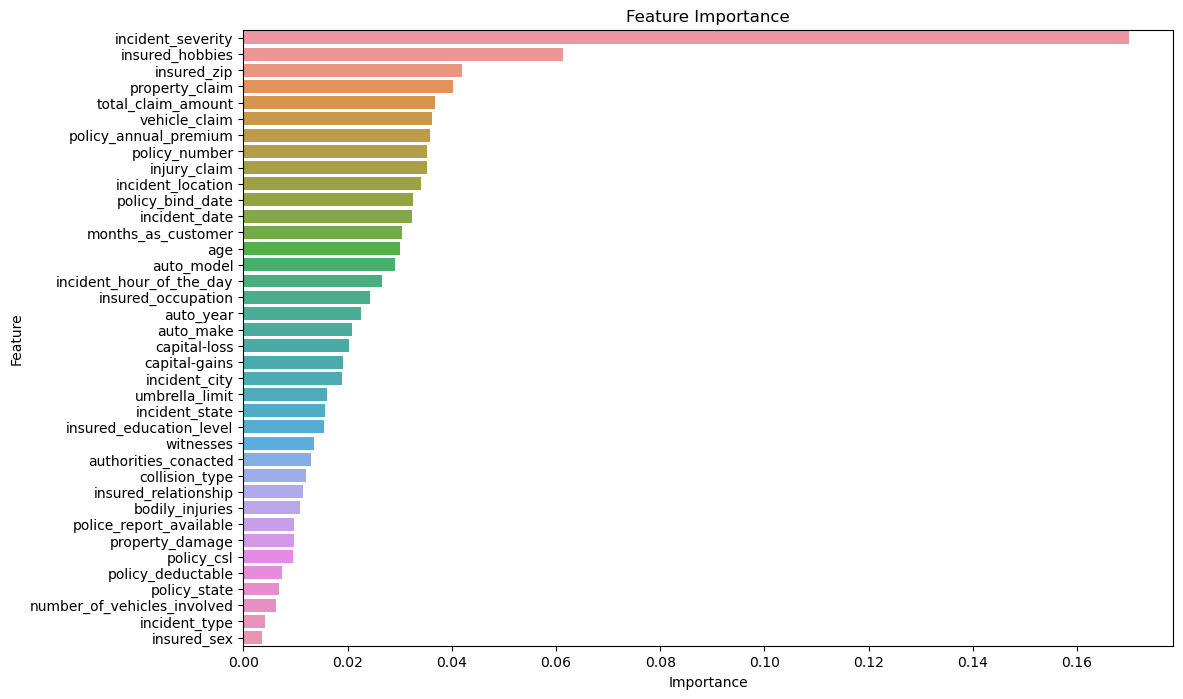

In [23]:
plt.figure(figsize=(12,8))
sns.barplot(x='Importance', y='Feature', data=importance_data)
plt.title('Feature Importance')
plt.show()